### <b>Problem Statement:
#### <b>A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

In [1]:
import pandas as pd

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving Company_Data.csv to Company_Data (2).csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Company_Data.csv']))

In [5]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [8]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(400, 11)

In [12]:
len(df)

400

In [13]:
df = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,0]]

In [14]:
df.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,9.50
1,111,48,16,260,83,Good,65,10,Yes,Yes,11.22


In [15]:
df.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000,7.496325
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528,2.824115
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000,5.390000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000,7.490000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000,9.320000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,16.270000


In [16]:
df.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

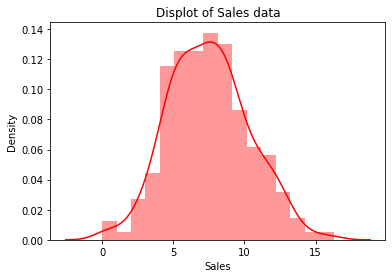

In [17]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df.Sales,kde=True,color='red')
plt.title('Displot of Sales data');

<font color='brown'><b>As the Sales data is normally distributed and the question is to find the attributes that cause high sale let's consider sales values below the mean value 7.5 as Low and above 7.5 as High.</b></font>

In [18]:
df['Sales_labels'] = pd.cut(x=df['Sales'], bins=[0,7.5,16.27], labels=['Low','High'],include_lowest=True)
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales,Sales_labels
0,138,73,11,276,120,Bad,42,17,Yes,Yes,9.50,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,11.22,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,10.06,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,7.40,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,4.15,Low


In [19]:
df.Sales_labels.value_counts()

Low     202
High    198
Name: Sales_labels, dtype: int64

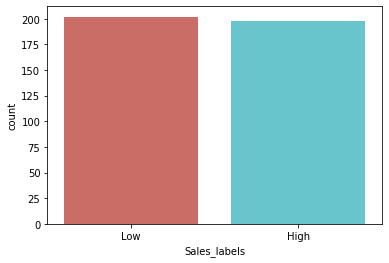

In [20]:
sns.countplot(x='Sales_labels',data=df, palette='hls');

### <font color='maroon'><b>Encode Categorical variables :</b></font>

In [21]:
from sklearn.preprocessing import OrdinalEncoder

In [22]:
ordn = OrdinalEncoder(categories=[['Bad','Medium','Good']])

In [23]:
df_enc = df.copy()
df_enc['ShelveLoc'] = ordn.fit_transform(df.loc[:,['ShelveLoc']])

df_enc.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales,Sales_labels
0,138,73,11,276,120,0.0,42,17,Yes,Yes,9.50,High
1,111,48,16,260,83,2.0,65,10,Yes,Yes,11.22,High
2,113,35,10,269,80,1.0,59,12,Yes,Yes,10.06,High
3,117,100,4,466,97,1.0,55,14,Yes,Yes,7.40,Low
4,141,64,3,340,128,0.0,38,13,Yes,No,4.15,Low


In [24]:
df_enc.dtypes

CompPrice          int64
Income             int64
Advertising        int64
Population         int64
Price              int64
ShelveLoc        float64
Age                int64
Education          int64
Urban             object
US                object
Sales            float64
Sales_labels    category
dtype: object

In [25]:
df_enc['ShelveLoc'] = df_enc['ShelveLoc'].astype(int)

In [26]:
df_enc.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales,Sales_labels
0,138,73,11,276,120,0,42,17,Yes,Yes,9.50,High
1,111,48,16,260,83,2,65,10,Yes,Yes,11.22,High


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()

categ = ['Urban','US']
df_enc[categ] = df[categ].apply(le.fit_transform)
df_enc.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales,Sales_labels
0,138,73,11,276,120,0,42,17,1,1,9.50,High
1,111,48,16,260,83,2,65,10,1,1,11.22,High
2,113,35,10,269,80,1,59,12,1,1,10.06,High
3,117,100,4,466,97,1,55,14,1,1,7.40,Low
4,141,64,3,340,128,0,38,13,1,0,4.15,Low


In [29]:
df_enc.shape

(400, 12)

### <font color='maroon'><b>Split into independent and dependent variables :</b></font>

In [30]:
X = df_enc.iloc[:,:10]
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [31]:
y = df_enc['Sales_labels']

### <font color='maroon'><b>Feature Scaling :</b></font>

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
x = scaler.fit_transform(X)
x

array([[ 0.85045499,  0.15536099,  0.65717702, ...,  1.18444912,
         0.64686916,  0.74188112],
       [-0.91248434, -0.73906037,  1.40995711, ..., -1.4901134 ,
         0.64686916,  0.74188112],
       [-0.78189624, -1.20415947,  0.506621  , ..., -0.72595268,
         0.64686916,  0.74188112],
       ...,
       [ 2.41751217, -1.52615116,  0.80773304, ...,  1.56652948,
         0.64686916,  0.74188112],
       [-1.63071888,  0.37002211,  0.05495295, ..., -0.72595268,
         0.64686916,  0.74188112],
       [ 0.58927879, -1.13260576, -0.99893918, ...,  0.80236876,
         0.64686916,  0.74188112]])

### <font color='maroon'><b>Train Test Split :</b></font>

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

In [37]:
y_train.value_counts()

Low     167
High    153
Name: Sales_labels, dtype: int64

In [38]:
y_test.value_counts()

High    45
Low     35
Name: Sales_labels, dtype: int64

## <font color='orange'><b> Decision Tree Classifier :</b></font>

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtree = DecisionTreeClassifier(random_state=0)

In [41]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

### <font color='peach'><b>Plot tree :

In [42]:
from sklearn.tree import plot_tree

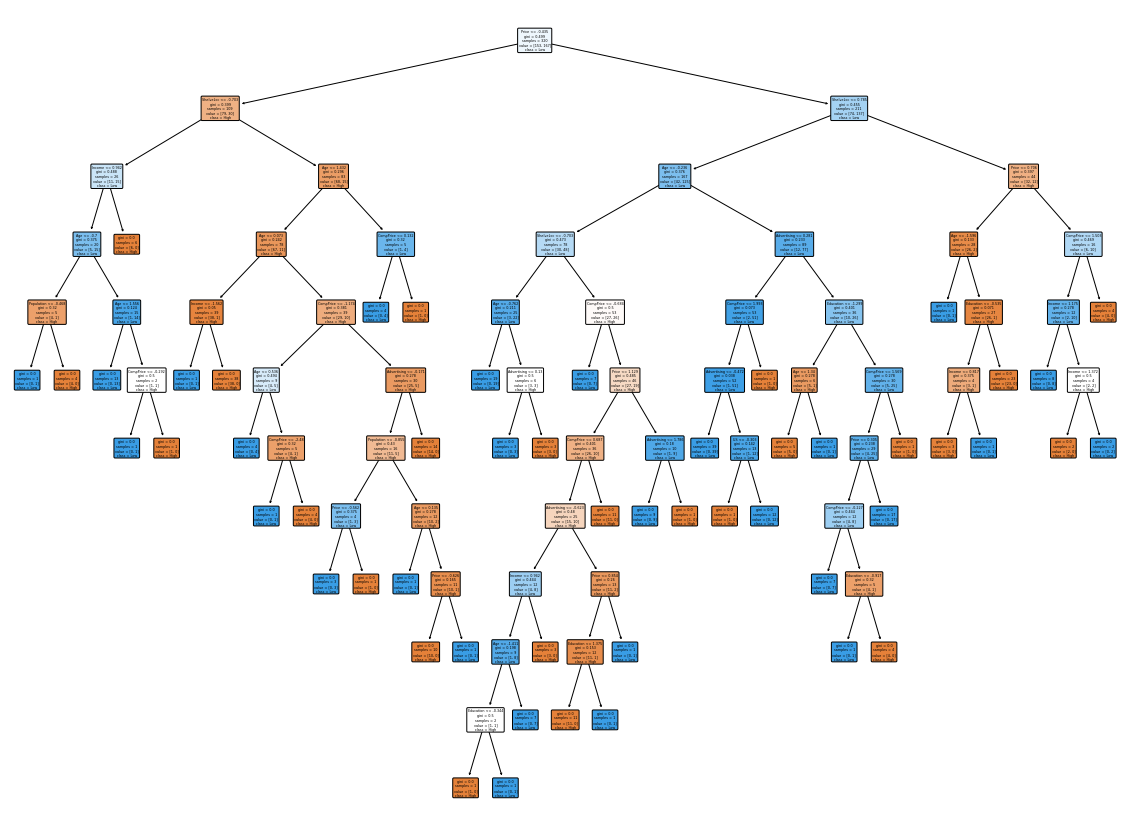

In [43]:
plt.figure(figsize=(20,15))
plot_tree(dtree,feature_names=X.columns,class_names=y.unique(),filled=True,rounded=True);

In [44]:
train_pred = dtree.predict(X_train)

In [45]:
test_pred = dtree.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_train,train_pred)

1.0

In [48]:
accuracy_score(y_test,test_pred)

0.7125

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

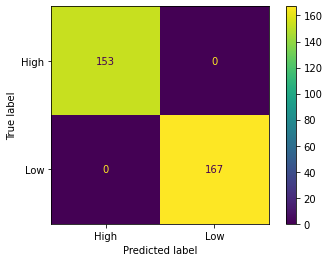

In [50]:
ConfusionMatrixDisplay.from_predictions(y_train,train_pred,display_labels=y.unique())
plt.grid(False);

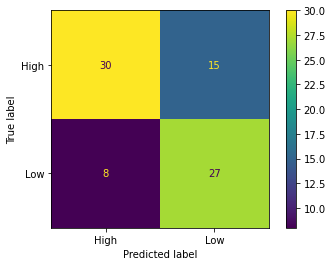

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test,test_pred,display_labels=y.unique())
plt.grid(False);

### <font color='maroon'><b> Grid Search CV</font>

In [52]:
param_dist = {
    'max_depth':[1,2,3,4,5,None],
    'min_samples_leaf':[1,2,3,4],
    'min_samples_split':[2,3,4]
}

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
grid = GridSearchCV(dtree, param_grid=param_dist, cv=10)      # kfold cv where k=10

In [55]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4]})

In [56]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=0)

In [57]:
grid.best_params_

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [58]:
grid.best_score_

0.69375

## <font color='darkgreen'><b>Decision Tree Classifier with Pre-Pruning :

### <font color='green'><b>Plot Tree</b></font>

In [59]:
dtre2 = DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2, random_state=0)

In [60]:
dtre2.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=2, random_state=0)

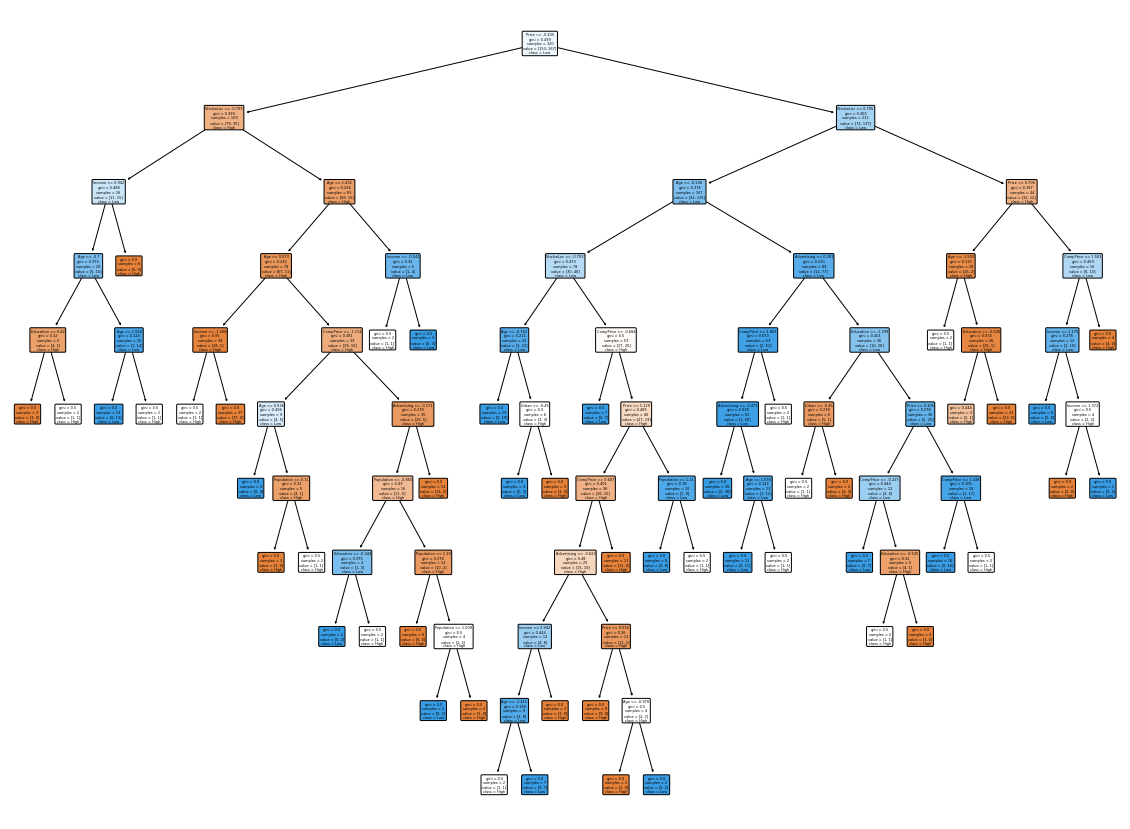

In [61]:
plt.figure(figsize=(20,15))
plot_tree(dtre2,feature_names=X.columns,class_names=y.unique(),filled=True,rounded=True);

In [62]:
train_pred2 = dtre2.predict(X_train)
test_pred2 = dtre2.predict(x_test)

In [63]:
accuracy_score(y_train,train_pred2)

0.953125

In [64]:
accuracy_score(y_test,test_pred2)

0.7

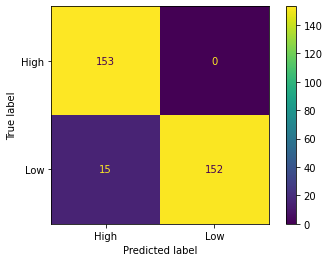

In [65]:
ConfusionMatrixDisplay.from_predictions(y_train,train_pred2,display_labels=y.unique())
plt.grid(False);

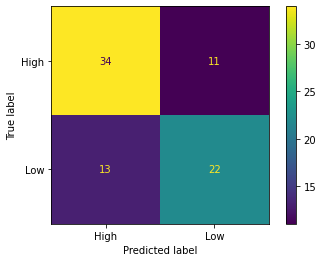

In [66]:
ConfusionMatrixDisplay.from_predictions(y_test,test_pred2,display_labels=y.unique())
plt.grid(False);

<font color='purple'><b> The model is still overfitting as there is vast difference bwetween training set accuracy and test set accuracy.

## <font color='darkgreen'><b>Post-Pruning of Decision Tree Classifier :

In [67]:
dt_ccp = DecisionTreeClassifier(random_state=0)
path = dt_ccp.cost_complexity_pruning_path(X_train,y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.00277778, 0.00291667, 0.00300926, 0.0030649 ,
       0.0046875 , 0.005     , 0.005     , 0.005     , 0.005     ,
       0.00520833, 0.00520833, 0.00520833, 0.00528846, 0.00546875,
       0.00558862, 0.005625  , 0.00589849, 0.00608974, 0.00701389,
       0.00730769, 0.00825   , 0.0096688 , 0.01080467, 0.01260417,
       0.01275274, 0.01302083, 0.01600956, 0.0161016 , 0.01620978,
       0.01622596, 0.0194238 , 0.01950081, 0.04926872, 0.06285226])

In [68]:
accuracy_train, accuracy_test = [],[]

for i in alphas:
  dt_ccp = DecisionTreeClassifier(ccp_alpha=i)

  dt_ccp.fit(X_train,y_train)
  y_train_pred = dt_ccp.predict(X_train)
  y_test_pred = dt_ccp.predict(x_test)

  accuracy_train.append(accuracy_score(y_train,y_train_pred))
  accuracy_test.append(accuracy_score(y_test,y_test_pred))

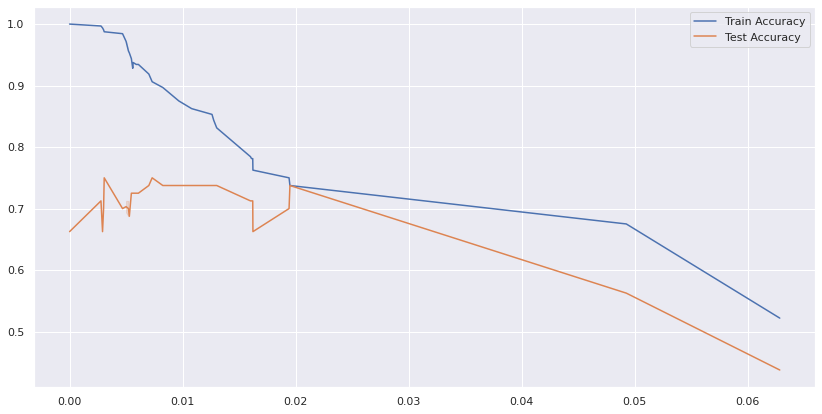

In [69]:
sns.set()

plt.figure(figsize=(14,7))
sns.lineplot(x=alphas, y=accuracy_train, label='Train Accuracy')
sns.lineplot(x=alphas, y=accuracy_test, label='Test Accuracy');

<font color='purple'><b>From the above plot it is at 0.019(approx.) alpha where the test accuracy is maximum and train accuracy has decreased, so the model can be more genralized now and will perform better on unseen data.

In [70]:
dt_ccp = DecisionTreeClassifier(ccp_alpha = 0.019567, random_state=0)
dt_ccp.fit(X_train,y_train)
y_train_pred1 = dt_ccp.predict(X_train)
y_test_pred1 = dt_ccp.predict(x_test)

print(accuracy_score(y_train,y_train_pred1), accuracy_score(y_test,y_test_pred1))

0.7375 0.7375


<font color='peach'><b>Now the training set accuracy and test data accuracy are exactly same = 0.7375

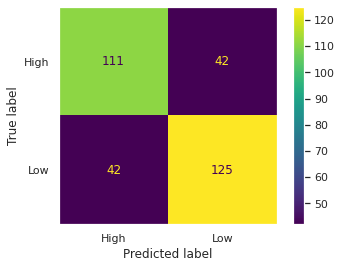

In [71]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred1,display_labels=y.unique())
plt.grid(False);

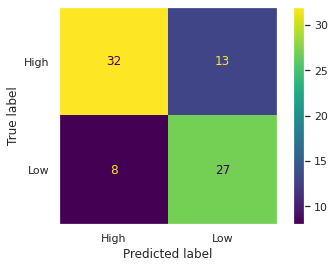

In [72]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred1,display_labels=y.unique())
plt.grid(False);

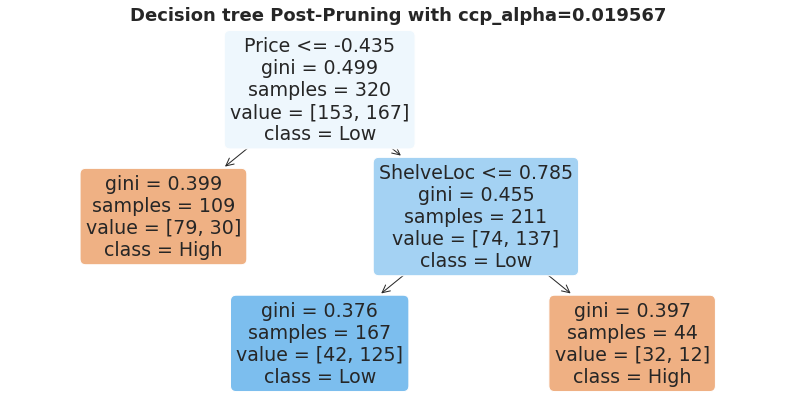

In [73]:
plt.figure(figsize=(14,7))
plot_tree(dt_ccp,feature_names=X.columns,class_names=y.unique(),filled=True,rounded=True)
plt.title('Decision tree Post-Pruning with ccp_alpha=0.019567',fontsize = 18, fontweight = 'bold');

## <font color='hotpink'><b>Feature Importance</b></font>

In [74]:
dtree.feature_importances_

array([0.15122057, 0.0972481 , 0.0759348 , 0.02280407, 0.24325041,
       0.16991346, 0.16980834, 0.05825966, 0.        , 0.01156059])

In [75]:
df_imp_fea = pd.DataFrame({'Feature':X.columns,'Importance':dtree.feature_importances_})

In [76]:
df_imp_fea

,Feature,Importance
0,CompPrice,0.151221
1,Income,0.097248
2,Advertising,0.075935
3,Population,0.022804
4,Price,0.243250
5,ShelveLoc,0.169913
6,Age,0.169808
7,Education,0.058260
8,Urban,0.000000
9,US,0.011561


In [77]:
df_imp_fea_sorted = df_imp_fea.sort_values('Importance',ascending=False).reset_index(drop=True)
df_imp_fea_sorted

,Feature,Importance
0,Price,0.243250
1,ShelveLoc,0.169913
2,Age,0.169808
3,CompPrice,0.151221
4,Income,0.097248
5,Advertising,0.075935
6,Education,0.058260
7,Population,0.022804
8,US,0.011561
9,Urban,0.000000


In [78]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


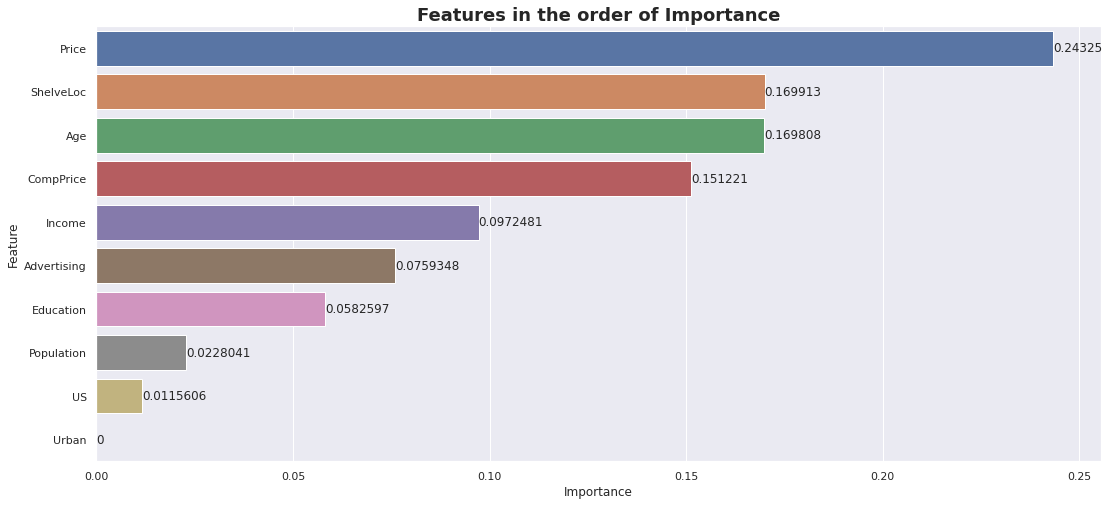

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (18,8))
ax = sns.barplot(x = 'Importance', y = 'Feature', data=df_imp_fea_sorted)
plt.title('Features in the order of Importance',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)